Useful msprime docs:
https://github.com/jeromekelleher/spg-chapter/blob/master/jupyter/msprime-chapter-examples.ipynb

In [350]:
%matplotlib inline
import msprime
import matplotlib.pyplot as plt
import ipyrad.analysis as ipa
from tempfile import TemporaryFile
from IPython.display import SVG, display


  INFO: # PCs < # samples. Forcing # PCs = 8


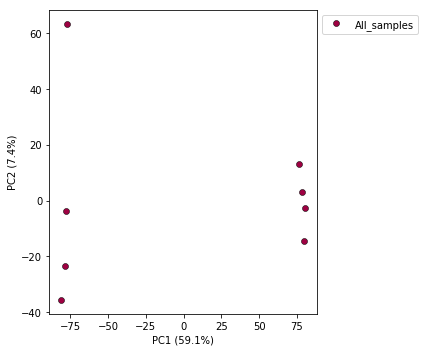

In [369]:
local_Ne = 1e5
g = 0
split_time = 2e5
pop1_samples = 8
pop2_samples = 8
length=150

migmat = [[0, 0], [0, 0]]

def simulate_one_nloci(n=1):
    ts_list = []
    for i in xrange(n):
        pop1 = msprime.PopulationConfiguration(sample_size=pop1_samples,
                                            initial_size=local_Ne,
                                            growth_rate=g)

        pop2 = msprime.PopulationConfiguration(sample_size=pop2_samples,
                                            initial_size=local_Ne,
                                            growth_rate=g)

        split_event = msprime.MassMigration(time=split_time,
                                            source=0,
                                            destination=1,
                                            proportion=1)

        debug = msprime.DemographyDebugger(population_configurations=[pop1, pop2],
                                            demographic_events=[split_event],
                                            migration_matrix=migmat)

        tree_sequence = msprime.simulate(length=length,\
                                            migration_matrix=migmat,\
                                            mutation_rate=1e-8, \
                                            population_configurations=[pop1, pop2],\
                                            demographic_events=[split_event])
        ts_list.append(tree_sequence)

    return ts_list

def plot_tree_sequence(tree_sequence):
    tree = tree_sequence.first()
    colour_map = {0:"red", 1:"blue"}
    node_colours = {u: colour_map[tree.population(u)] for u in tree.nodes()}
    display(SVG(tree.draw(width=600, height=400, node_colours=node_colours)))

def write_vcf(ts_list, outfile):
    with open(outfile, 'w') as output:
        ts_list[0].write_vcf(output, ploidy=2, contig_id='1')
        for i, ts in enumerate(ts_list[1:]):
            with TemporaryFile() as outtmp:
                ## the +2 here is because enumerate starts at 0, and we
                ## want our first locus of this list to start at 2
                ts.write_vcf(outtmp, ploidy=2, contig_id=str(i+2))
                outtmp.seek(0)
                ## Get rid of the 6 lines of vcf header
                dat = outtmp.readlines()[6:]
                output.write("".join(dat))

## 100 loci is almost instant
## 1000 loci ~5 seconds
ts_list = simulate_one_nloci(n=1000)
#plot_tree_sequence(ts_list[0])
write_vcf(ts_list, "/tmp/tmp.vcf")
pca = ipa.pca("/tmp/tmp.vcf")
pca.plot()

  INFO: # PCs < # samples. Forcing # PCs = 6


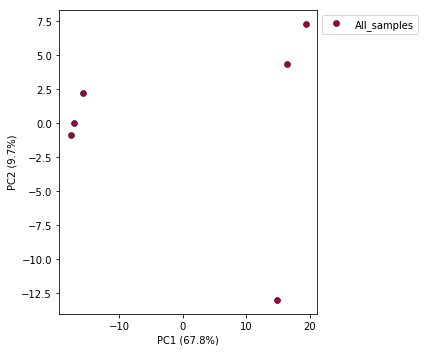

In [353]:
pca = ipa.pca("/tmp/tmp.vcf")
pca.plot()